Modeling


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
file_dir = './global_commodity_prices/commodity_prices.csv'

In [3]:
df = pd.read_csv(file_dir)
df.head()

,Unnamed: 0,date,oil_brent,oil_dubai,coffee_arabica,coffee_robustas,tea_columbo,tea_kolkata,tea_mombasa,sugar_eu,sugar_us,sugar_world
0,1,1960-01-01,1.63,1.63,0.9409,0.696864,0.930301,1.121401,1.0374,0.122356,0.116845,0.0666
1,2,1960-02-01,1.63,1.63,0.9469,0.688707,0.930301,1.121401,1.0374,0.122356,0.119049,0.0679
2,3,1960-03-01,1.63,1.63,0.9281,0.688707,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683
3,4,1960-04-01,1.63,1.63,0.9303,0.684519,0.930301,1.121401,1.0374,0.122356,0.123459,0.0681
4,5,1960-05-01,1.63,1.63,0.9200,0.690692,0.930301,1.121401,1.0374,0.122356,0.121254,0.0683


In [4]:
# We are only interested to `sugar_world` column.
# Load data into dataframe
df = pd.read_csv(file_dir)
df.drop(['Unnamed: 0', 'oil_brent', 'oil_dubai', 'coffee_arabica',
       'coffee_robustas', 'tea_columbo', 'tea_kolkata', 'tea_mombasa',
       'sugar_eu', 'sugar_us'], axis = 1, inplace = True)
# Convert 'date' column to datetime object
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,sugar_world
0,1960-01-01,0.0666
1,1960-02-01,0.0679
2,1960-03-01,0.0683
3,1960-04-01,0.0681
4,1960-05-01,0.0683


In [5]:
# Add 'month' column
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday # returns the day of the week as an integer, where Monday is 0 and Sunday is 6
df['year'] = df['date'].dt.year
# Add column for weekend and weekday
df['is_weekend'] = (df['date'].dt.weekday >= 5).astype(int)
df['is_weekday'] = ((df['date'].dt.weekday >= 0) & (df['date'].dt.weekday <= 4)).astype(int)

# Display dataframe with new column
df.head()

,date,sugar_world,month,day,weekday,year,is_weekend,is_weekday
0,1960-01-01,0.0666,1,1,4,1960,0,1
1,1960-02-01,0.0679,2,1,0,1960,0,1
2,1960-03-01,0.0683,3,1,1,1960,0,1
3,1960-04-01,0.0681,4,1,4,1960,0,1
4,1960-05-01,0.0683,5,1,6,1960,1,0


In [6]:
df.drop('date', axis = 1, inplace = True)
df.head()

,sugar_world,month,day,weekday,year,is_weekend,is_weekday
0,0.0666,1,1,4,1960,0,1
1,0.0679,2,1,0,1960,0,1
2,0.0683,3,1,1,1960,0,1
3,0.0681,4,1,4,1960,0,1
4,0.0683,5,1,6,1960,1,0


In [7]:
# Make a new subset quarterly
df_sugar_quarterly = df.copy()

# Initialize the 'qrtr' column with zeros
df_sugar_quarterly['price_quarterly'] = 0

# Define the range and step size
start = 0
end = len(df_sugar_quarterly)
step = 3

# Loop through the specified range with the given step size
for i in range(start, end, step):
    current_range = (i, i+2)
    mean_qrtr = df_sugar_quarterly['sugar_world'][current_range[0]:current_range[1]+1].mean()
    df_sugar_quarterly.loc[current_range[0]:current_range[1], 'price_quarterly'] = mean_qrtr

In [8]:
df_sugar_quarterly.columns

Index(['sugar_world', 'month', 'day', 'weekday', 'year', 'is_weekend',
       'is_weekday', 'price_quarterly'],
      dtype='object')

In [9]:
df_sugar_quarterly = df_sugar_quarterly[['year', 'price_quarterly']]
df_sugar_quarterly[-12:]

,year,price_quarterly
744,2022,0.405136
745,2022,0.405136
746,2022,0.405136
747,2022,0.426667
748,2022,0.426667
749,2022,0.426667
750,2022,0.395656
751,2022,0.395656
752,2022,0.395656
753,2022,0.403886


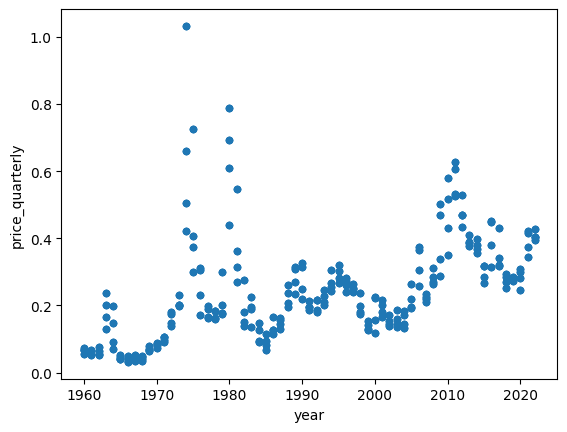

In [10]:
df_sugar_quarterly.plot(kind='scatter', x='year', y='price_quarterly');

When it comes to predicting prices, especially in a time-series context like sugar prices, you should consider using regression models. Regression models are a type of supervised machine learning algorithm that is suitable for predicting continuous numeric values, such as prices. In the case of time-series data, you might also want to consider time-series specific models.

* Linear Regression
* Decision Trees and Random Forest
* Support Vector Regression (SVR)
* Gradient Boosting Regressor

Data Preprocessing

In [11]:
df_sugar_quarterly.head()

,year,price_quarterly
0,1960,0.067600
1,1960,0.067600
2,1960,0.067600
3,1960,0.067667
4,1960,0.067667


In [12]:
x = df_sugar_quarterly['year']
y = df_sugar_quarterly['price_quarterly']

In [13]:
len(x), len(y)

(756, 756)

In [14]:
# Reshape Series Values
X = x.values.reshape(-1, 1)

In [15]:
# Assuming df is your time series DataFrame
split_size = int(len(df)* 0.8)

X_train = X[:split_size]
y_train = y[:split_size]

X_test =  X[split_size:]
y_test = y[split_size:]

In [16]:
len(X_train), len(y_train), len(X_test), len(y_test)

(604, 604, 152, 152)

Train a Model using Linear Regression and make predictions

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred[:5]

array([0.27947303, 0.27947303, 0.27947303, 0.27947303, 0.27947303])

In [18]:
# Evaluate the Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred)
mse_lr = round(mse_lr, 4)
print(f"Mean Squared Error: {mse_lr}")

Mean Squared Error: 0.0164


In [19]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# comparison_df['Percentage_Errors'] = np.abs((y_test - y_pred) / y_test) * 100
# comparison_df['Average_percentage_Error'] = np.mean(np.abs((y_test - y_pred) / y_test) * 100)
comparison_df

,Actual,Predicted
604,0.349285,0.279473
605,0.349285,0.279473
606,0.429754,0.279473
607,0.429754,0.279473
608,0.429754,0.279473
...,...,...
751,0.395656,0.314651
752,0.395656,0.314651
753,0.403886,0.314651
754,0.403886,0.314651


The percentage error provides a measure of the relative accuracy of your predictions in comparison to the actual values. A lower percentage error indicates better accuracy.

Train a Model using Random Forest Regression and make predictions

In [20]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse_rfr = mean_squared_error(y_test, y_pred)
mse_rfr = round(mse_rfr, 4)
print("Mean Squared Error:", mse_rfr)

Mean Squared Error: 0.0178


In [21]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# comparison_df['Percentage_Errors'] = np.abs((y_test - y_pred) / y_test) * 100
# comparison_df['Average_percentage_Error'] = np.mean(np.abs((y_test - y_pred) / y_test) * 100)
comparison_df

,Actual,Predicted
604,0.349285,0.475916
605,0.349285,0.475916
606,0.429754,0.475916
607,0.429754,0.475916
608,0.429754,0.475916
...,...,...
751,0.395656,0.475916
752,0.395656,0.475916
753,0.403886,0.475916
754,0.403886,0.475916


Train a Model using Support Vector Regression and make predictions

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model
svr_regressor = SVR(kernel='linear')

# Fit the model on the training data
svr_regressor.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [23]:
# Make predictions on the test data
y_pred = svr_regressor.predict(X_test_scaled)

# Calculate mean squared error
mse_svr = mean_squared_error(y_test, y_pred)
mse_svr = round(mse_svr, 4)
print("Mean Squared Error:", mse_svr)

Mean Squared Error: 0.0167


Train a Model using Gradient Boosting Regression and make predictions

In [30]:
gb_regressor = GradientBoostingRegressor(n_estimators=22, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred)
mse_gbr = round(mse_gbr, 4)
print("Mean Squared Error:", mse_gbr)

Mean Squared Error: 0.0085


In [31]:
sum_dict = {'Gradient Boosting Regressor': mse_gbr,
            'Support Vector Regressor': mse_svr,
            'Random Forest Regressor': mse_rfr,
            'Linear Regressor': mse_lr}

result_df = pd.DataFrame.from_dict(sum_dict, 
                                   orient='index', 
                                   columns=['Mean Squared Error'])
print(result_df)

                             Mean Squared Error
Gradient Boosting Regressor              0.0085
Support Vector Regressor                 0.0167
Random Forest Regressor                  0.0178
Linear Regressor                         0.0164


Summary

Let's try to insert the sugar world price today 2023 Q1, Q2 and Q3 and see how close our prediction using the lowest regression model MSE we have.

In [26]:
# Make predictions for 2023 Q1 and Q
new_data = [[2023],
            [2023]]

In [36]:
# Making predictions using Gradient Boosting Regressor
yr_pred = gb_regressor.predict(new_data)
yr_pred = yr_pred.tolist()
q1 = yr_pred[0]
q2 = yr_pred[1]
q1 = round(q1, 4)
q2 = round(q2, 4)

print(f"Sugar Price prediction using Gradient Boosting Regressor for 2023 Q1 is {q1}")
print(f"Sugar Price prediction using Gradient Boosting Regressor for 2023 Q1 is {q2}")

Sugar Price prediction using Gradient Boosting Regressor for 2023 Q1 is 0.3829
Sugar Price prediction using Gradient Boosting Regressor for 2023 Q1 is 0.3829


In [37]:
# Making predictions using Support Vector Regressor
yr_pred = svr_regressor.predict(new_data)
yr_pred = yr_pred.tolist()
q1 = yr_pred[0]
q2 = yr_pred[1]
q1 = round(q1, 4)
q2 = round(q2, 4)

print(f"Sugar Price prediction using Support Vector Regressor for 2023 Q1 is {q1}")
print(f"Sugar Price prediction using Support Vector Regressor for 2023 Q1 is {q2}")

Sugar Price prediction using Support Vector Regressor for 2023 Q1 is 89.9262
Sugar Price prediction using Support Vector Regressor for 2023 Q1 is 89.9262


In [38]:
# Making predictions using Random Forest Regressor
yr_pred = rf_regressor.predict(new_data)
yr_pred = yr_pred.tolist()
q1 = yr_pred[0]
q2 = yr_pred[1]
q1 = round(q1, 4)
q2 = round(q2, 4)

print(f"Sugar Price prediction using Random Forest Regressor for 2023 Q1 is {q1}")
print(f"Sugar Price prediction using Random Forest Regressor for 2023 Q1 is {q2}")

Sugar Price prediction using Random Forest Regressor for 2023 Q1 is 0.4759
Sugar Price prediction using Random Forest Regressor for 2023 Q1 is 0.4759


In [39]:
# Making predictions using Linear Model
yr_pred = model.predict(new_data)
yr_pred = yr_pred.tolist()
q1 = yr_pred[0]
q2 = yr_pred[1]
q1 = round(q1, 4)
q2 = round(q2, 4)

print(f"Sugar Price prediction using Random Forest Regressor for 2023 Q1 is {q1}")
print(f"Sugar Price prediction using Random Forest Regressor for 2023 Q1 is {q2}")

Sugar Price prediction using Random Forest Regressor for 2023 Q1 is 0.3176
Sugar Price prediction using Random Forest Regressor for 2023 Q1 is 0.3176


Based on the other notebook, we have the following:\
Mean value Q1: 20.38\
Mean value Q2: 24.74

### Summary

It's important to note that while the Mean Squared Error (MSE) is a useful metric for evaluating the performance of regression models, it's not the only factor to consider. The MSE measures the average squared difference between the predicted values and the actual values. A lower MSE generally indicates a better fit to the data.

However, a lower MSE on the training data doesn't guarantee that the model will perform well on new, unseen data. There could be various reasons why a model with a lower MSE might still produce larger errors against actual values:

* Overfitting: A model with a low MSE on the training data might be overfitting to noise in the data, capturing random fluctuations that don't generalize well to new data.

* Bias-Variance Trade-off: Some models, like the Gradient Boosting Regressor, tend to have lower bias but can sometimes have higher variance, leading to larger errors on new data.

* Model Assumptions: Each regression model makes certain assumptions about the data distribution and relationships. If these assumptions are not met, the model might perform poorly even with a low MSE.

* Hyperparameters: Model performance can be sensitive to hyperparameter settings. Suboptimal hyperparameter choices can lead to poor generalization.

* Feature Engineering: The quality and relevance of the features used for prediction play a significant role in model performance.

* Outliers and Noise: Unseen data may contain outliers or noise that the model didn't encounter during training.

It's important to consider these factors when interpreting the results. While a lower MSE is generally a good indicator, it's always recommended to evaluate models using multiple metrics, cross-validation, and possibly other evaluation techniques to ensure that the model generalizes well to new data.